In [1]:
import pandas as pd
import numpy as np

# Display all columns
from IPython.display import display
pd.options.display.max_columns = None

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Split train/test
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Label Encode
from sklearn.preprocessing import label_binarize

# Feature Scaling (normalize data)
from sklearn.preprocessing import StandardScaler

# SVM
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Principal Components
from sklearn.decomposition import PCA

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Cross Validation
from sklearn.model_selection import KFold, cross_val_score

# Confusion Matrix
from sklearn.metrics import confusion_matrix

# ROC Curve
from sklearn.metrics import roc_curve, auc

# Classification Report
from sklearn.metrics import classification_report


### Data import

Web Watson Analytics IBM
https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

In [2]:
df = pd.read_csv('Data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
display(df.head())


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Question

Can we predict the amount claimed by a client?

Supervised classification problem. 

## Data Cleaning and Exploratory Analysis

In [3]:
# Columns of dataset
print( len(df.columns))
print(df.columns)
print(df.info())

24
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
Employ

In [4]:
# Missing values
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
# Know the unique values for each column
for item in df.columns.tolist():
    print(item, len(df[item].unique()))

Customer 9134
State 5
Customer Lifetime Value 8041
Response 2
Coverage 3
Education 5
Effective To Date 59
EmploymentStatus 5
Gender 2
Income 5694
Location Code 3
Marital Status 3
Monthly Premium Auto 202
Months Since Last Claim 36
Months Since Policy Inception 100
Number of Open Complaints 6
Number of Policies 9
Policy Type 3
Policy 9
Renew Offer Type 4
Sales Channel 4
Total Claim Amount 5106
Vehicle Class 6
Vehicle Size 3


### Categorical Features

#### Effective To Date

Change type to ordinal. 

In [6]:
# Change the type to ordinal.
print(df['Effective To Date'].dtype)
print('''''')
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])
print('Tye:', df['Effective To Date'].dtype)
print('--')
print('Min date:', df['Effective To Date'].min())
print('Max date:', df['Effective To Date'].max())
print('--')
print('Year:', df['Effective To Date'].dt.year.value_counts())
print(df['Effective To Date'].dt.month.value_counts())



object

Tye: datetime64[ns]
--
Min date: 2011-01-01 00:00:00
Max date: 2011-02-28 00:00:00
--
Year: 2011    9134
Name: Effective To Date, dtype: int64
1    4898
2    4236
Name: Effective To Date, dtype: int64


In [7]:
df['Effective To Date'] = df['Effective To Date'].apply(lambda x: x.toordinal())

#### Customers
Drop customer columns, it's not relevant for our model. 

In [8]:
# Unique value for each customer
print('type', df.Customer.dtype)
print(len(df.Customer.unique()))

df.drop(labels=['Customer'], axis=1, inplace=True)

type object
9134


In [9]:
# Values for each class in categorical features  
cols = [col for col in df.columns if (df[col].dtype == object) and col != 'Effective To Date']
print('Categorical Feature:', len(cols))
print('----------')
for i in cols:
    print('Name:', df[i].name)
    print('Type:', df[i].dtype)
    print('Unqiue value:', len(df[i].unique()))
    print(df[i].unique())
    print(((df[i].value_counts()/ sum(df[i].value_counts()))*100))
    print('----------')

Categorical Feature: 14
----------
Name: State
Type: object
Unqiue value: 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: State, dtype: float64
----------
Name: Response
Type: object
Unqiue value: 2
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: Response, dtype: float64
----------
Name: Coverage
Type: object
Unqiue value: 3
['Basic' 'Extended' 'Premium']
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: Coverage, dtype: float64
----------
Name: Education
Type: object
Unqiue value: 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: Education, dtype: float64
----------
Name: EmploymentStatus
Type: object
Unqiue value: 5
['Employed' 'Unempl

### Categorical Variable Visualization

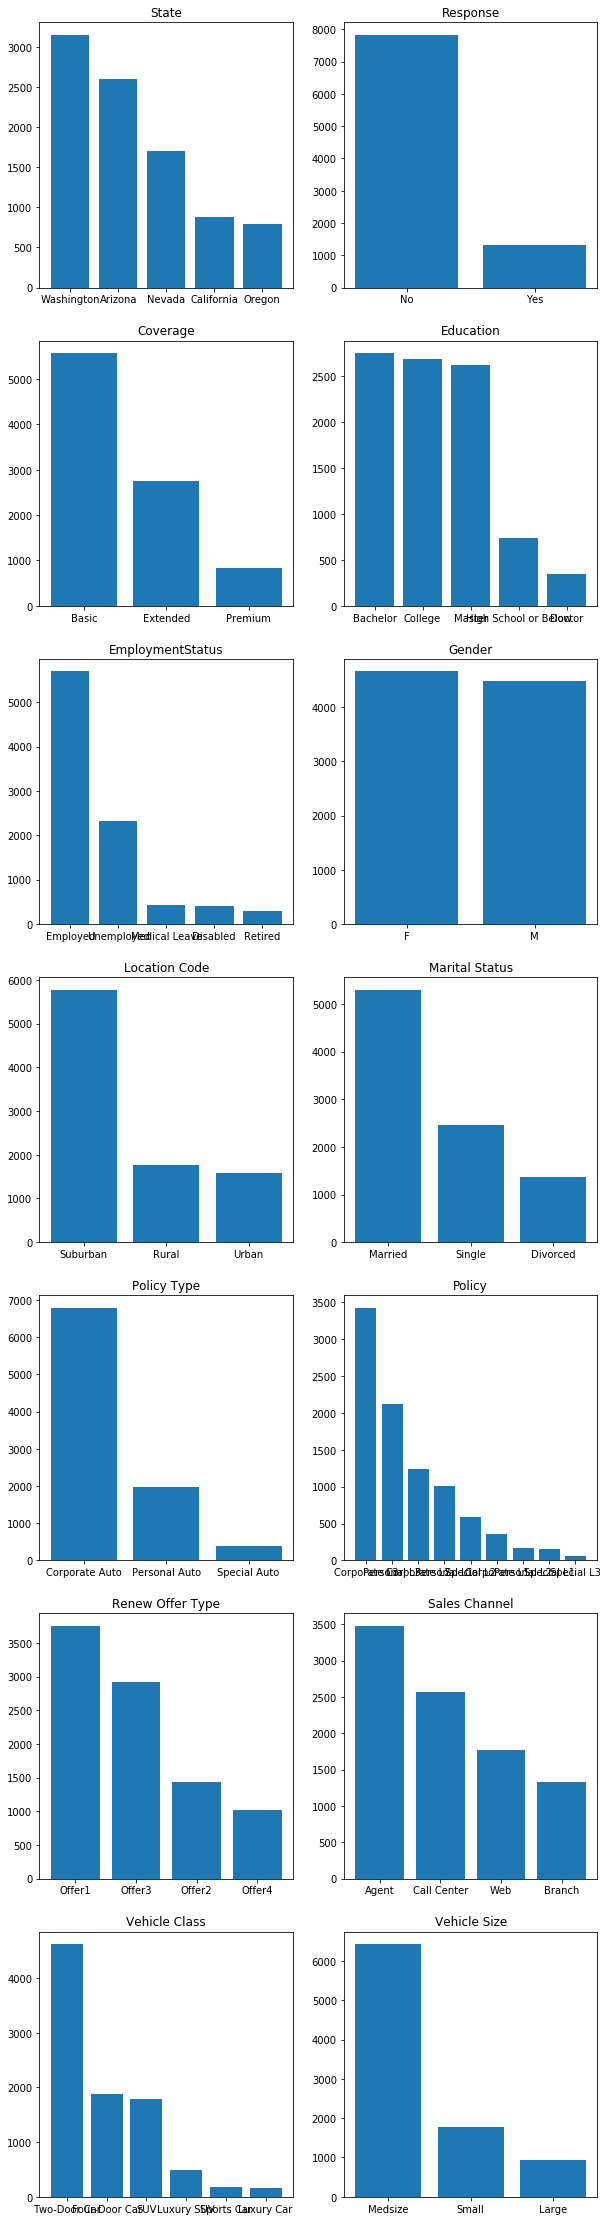

In [10]:
# Bar plot for each categorical variable.
y = [col for col in df.columns if df[col].dtype == object]
fig, axes = plt.subplots(int((len(y)/2)), 2, figsize=(10,40))
for i, x in enumerate(y):
    axes[int(i/2)][i%2].bar(df[x].unique(), df[x].value_counts())
    axes[int(i/2)][i%2].set_title(x)

plt.savefig(fname= 'Disribution')

### Numerical Features

In [11]:
# Statitics 
df.describe()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,734166.837749,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,16.942769,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,734138.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,734152.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,734166.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,734181.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,734196.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


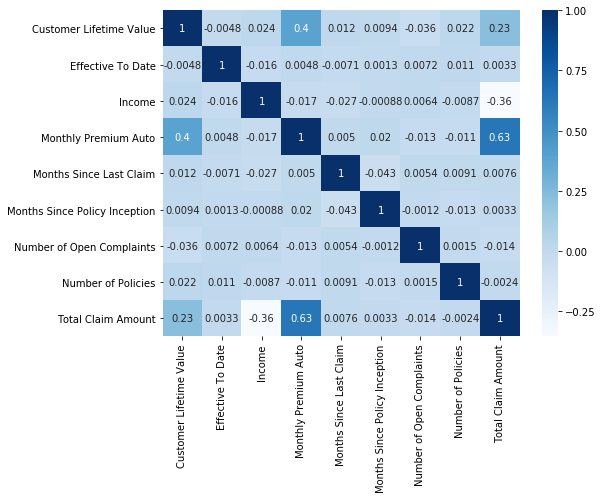

In [12]:
# Correlation Matrix
df.corr()
fig, axes = plt.subplots(1,1, figsize=(8,6))
sns.heatmap(df.corr(), cmap=plt.cm.Blues,  annot=True)
plt.savefig(fname= 'Correlation Matrix')

The numerical features show a non-linear relationship between the majority. Only the Customer's lifetime Value and the Total Claim Amount show a relationship with some characteristics.

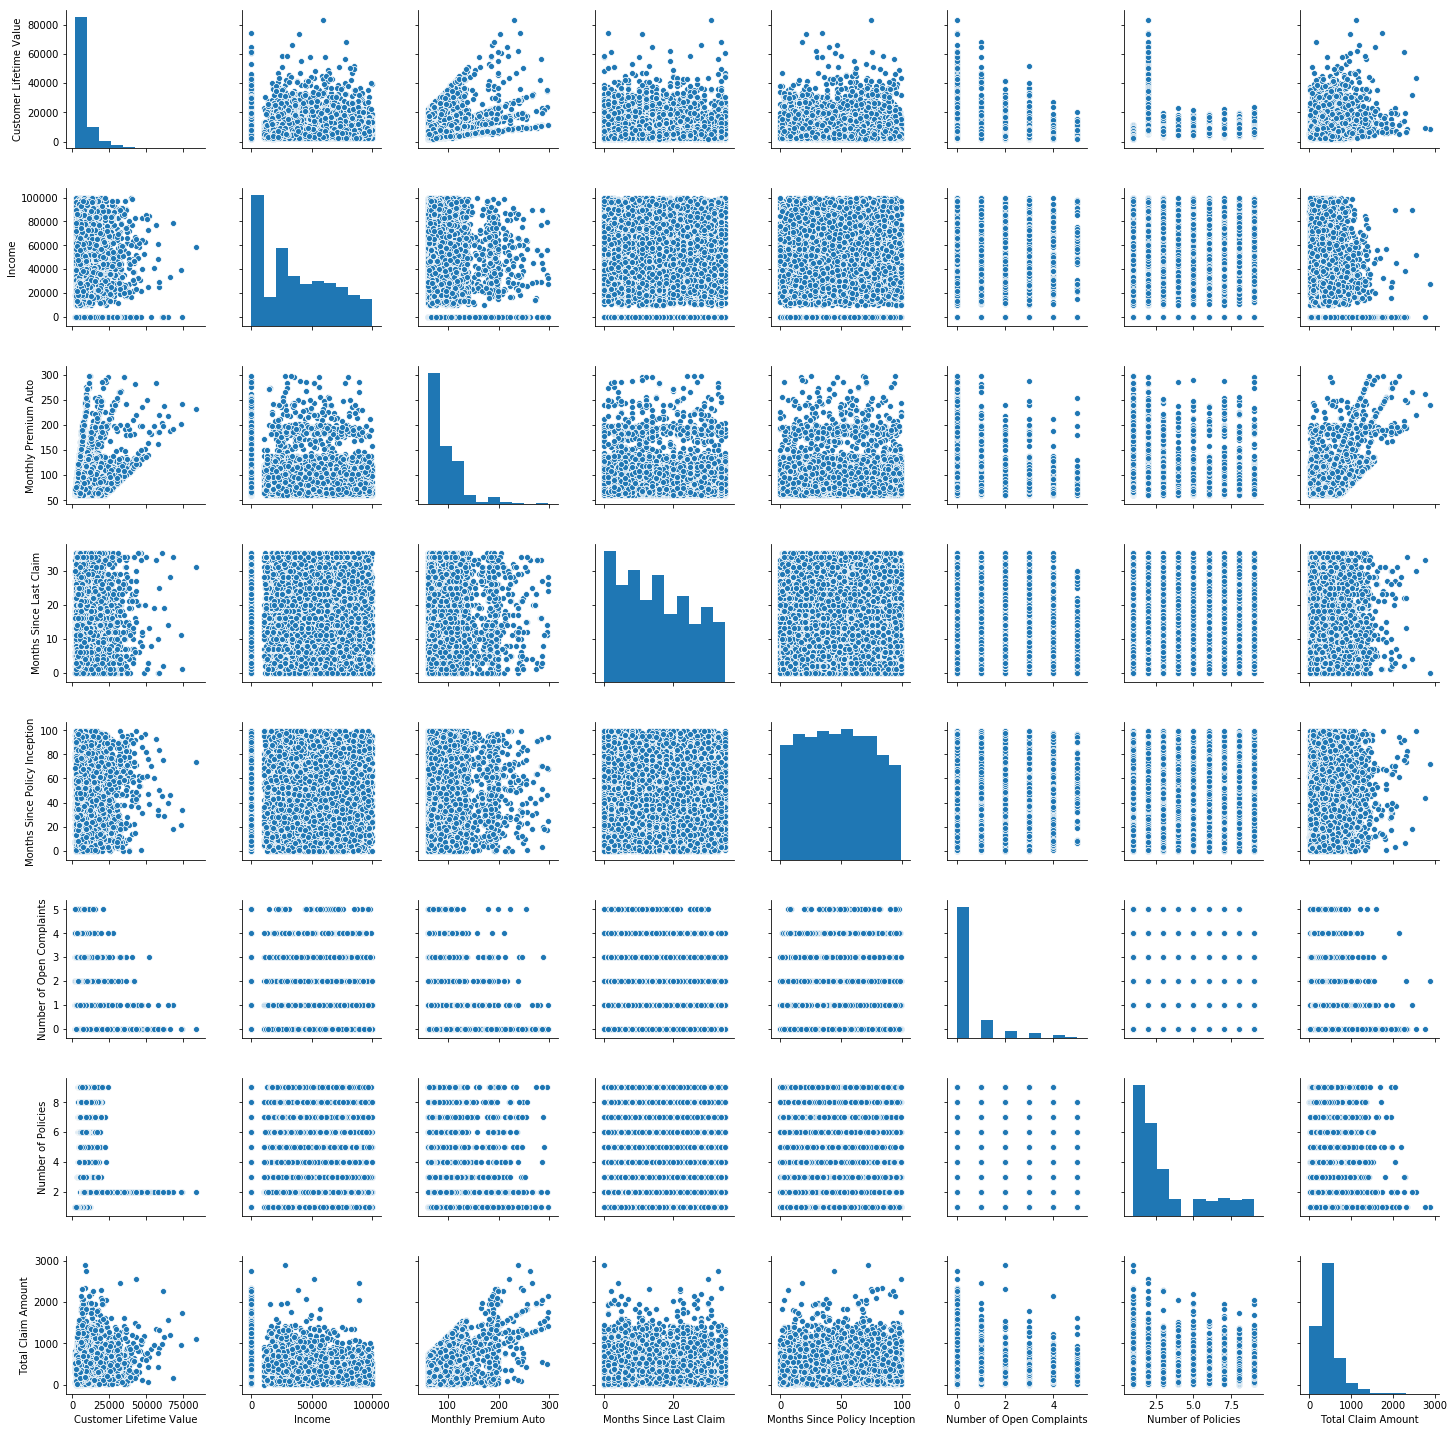

In [14]:
# Scatter Matrix
cols_numerical = [col for col in df.columns if (df[col].dtype != 'object') and (col != 'Effective To Date')]
a=pd.DataFrame(df, columns=cols_numerical)
sns.pairplot(a)

Histogram plot for each categorical variable. Know distribution of each feature.


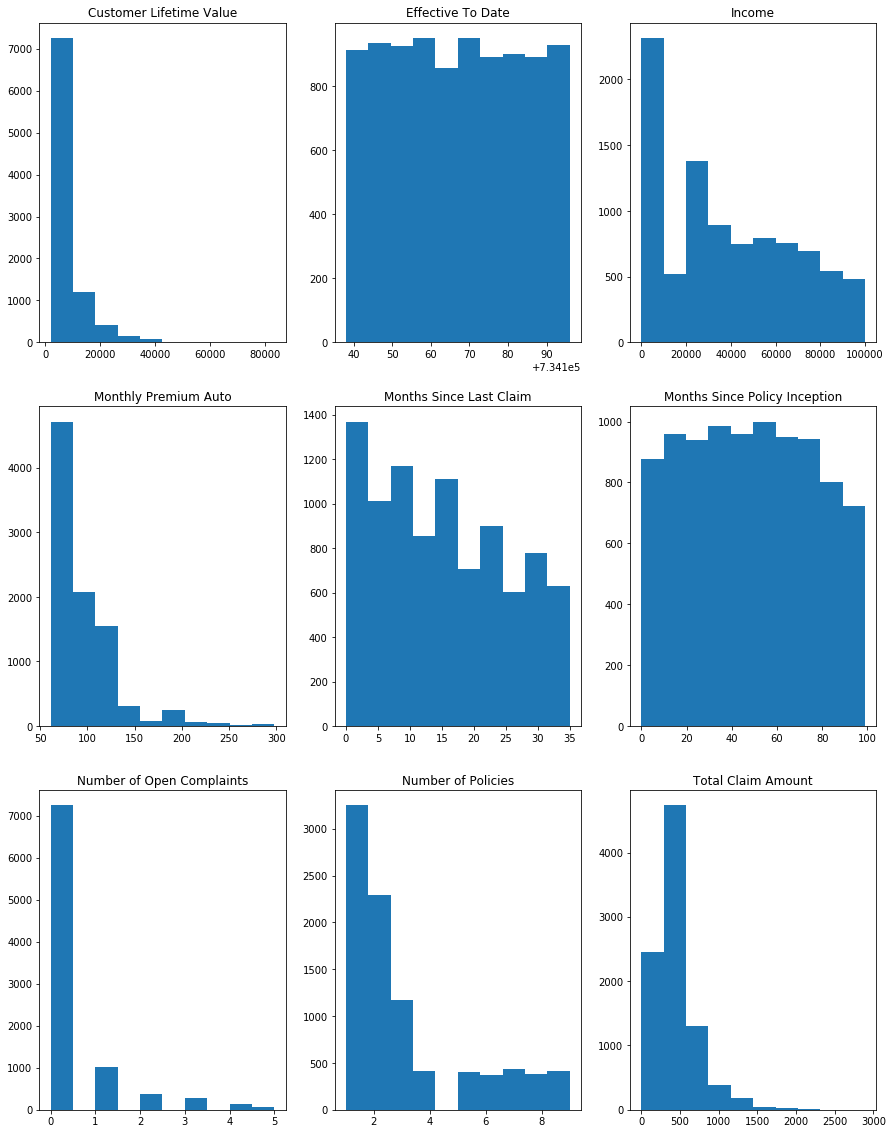

In [15]:
a = [col for col in df.columns if df[col].dtype != 'object']
fig, axes = plt.subplots(int((len(a)/3)), 3, figsize=(15,20))
for i, x in enumerate(a):
    axes[int(i/3)][i%3].hist(df[x])
    axes[int(i/3)][i%3].set_title(x)
plt.savefig(fname= 'Disribution Numerical Features')

Box plot for each categorical variable for know outliers of each feature.

In Total Claim Amount, Customer Lifetime Value and Monthly Premium Auto most data are concentrate in low values. 

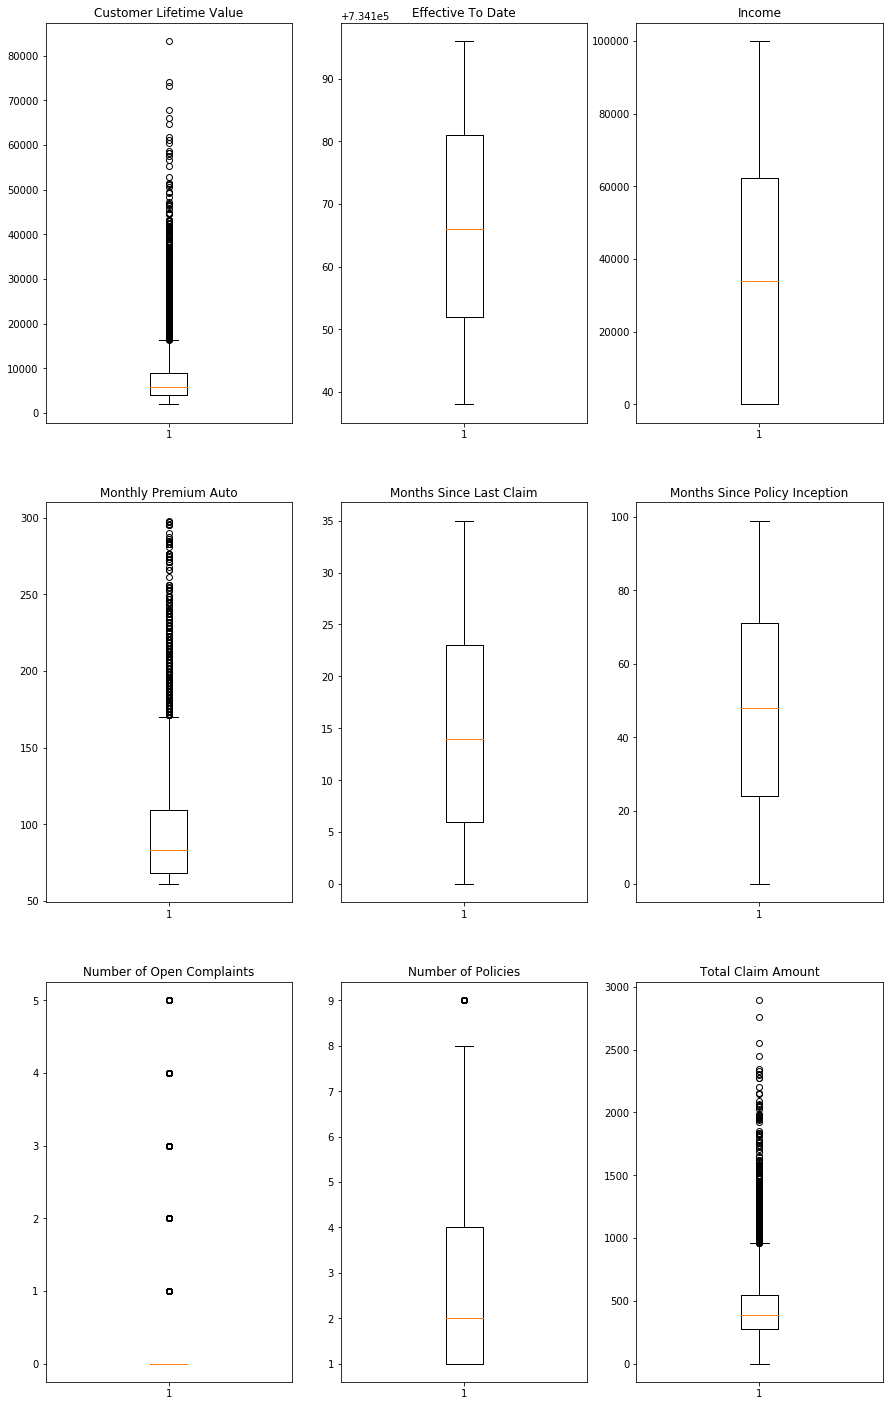

In [16]:
a = [col for col in df.columns if (df[col].dtype != 'object')]
fig, axes = plt.subplots(int((len(a)/3)), 3, figsize=(15,25))
for i, x in enumerate(a):
    axes[int(i/3)][i%3].boxplot(df[x])
    axes[int(i/3)][i%3].set_title(x)
plt.savefig(fname= 'Boxplot Numerical Features')

---

## Train models
### Target Total Claim Labels -- 3 Labels

#### Target/ Data 

Total Claim Amount <br>
Convert Total Claim amount in 3 class

In [17]:
Total_claim_min = df['Total Claim Amount'].min()
Total_claim_max = df['Total Claim Amount'].max()
Total_claim_mean = df['Total Claim Amount'].mean()
Total_claim_q1 = df['Total Claim Amount'].quantile(0.25)
Total_claim_q2 = df['Total Claim Amount'].quantile(0.75)
print(Total_claim_min, Total_claim_max, Total_claim_mean, Total_claim_q1, Total_claim_q2)

0.09900700000000001 2893.239678 434.0887943128969 272.2582445 547.5148387500001


Class (labels) <br>
0: Low <br>
1:Moderate <br>
2:High <br>


In [18]:
cutoffs = [0, Total_claim_q1, Total_claim_q2, Total_claim_max]
df['Total Claim Labels'] = pd.cut(df['Total Claim Amount'],cutoffs, labels=[0,1,2])
print(df['Total Claim Labels'].head())


0    1
1    2
2    2
3    1
4    0
Name: Total Claim Labels, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [19]:
# Problems with NaN
df.index[df['Total Claim Labels'].isna() == True].tolist()

[]

In [20]:
# Change type to int64
df['Total Claim Labels'] = df['Total Claim Labels'].astype('int64')
df['Total Claim Labels'].dtype

dtype('int64')

Let's convert data to ordinal using Pandas' get_dummies

In [21]:
columns=[col for col in df.columns if df[col].dtype == object]

df_model = pd.get_dummies(data=df, columns = columns, drop_first=True)
df_model.drop(labels=['Total Claim Amount'], axis=1, inplace=True)

In [22]:
df_model.head()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Labels,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,734192,56274,69,32,5,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,734168,0,94,13,42,0,8,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,734187,48767,108,18,38,0,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,734157,0,106,18,65,0,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,734171,43836,73,12,44,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
cols = [col for col in df_model.columns if col != 'Total Claim Labels']
X = df_model[cols]
y = df_model['Total Claim Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Define a function for matrix confussion

In [24]:
def print_matrix(cm, accuracy, model):
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap=plt.cm.Blues_r);
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    all_sample_title = model, 'Accuracy: {0}'.format(accuracy)
    plt.title(all_sample_title, size = 15)
    plt.savefig(fname= model)

### Support Vector Machine - SVC
First models using Support Vector Machine with SVC. <br>
Supervised learning method used for classification

In [25]:
clf = svm.SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
display(y_train.shape)
display(y_test.shape)
clf = svm.SVC()
clf.fit(X_train, y_train)
print('Score:', clf.score(X_test, y_test))
print('Intercept:', clf.intercept_)
y_pred1 = clf.predict(X_test)
accuracy_svm = metrics.accuracy_score(y_test, y_pred1)
print('Accuracy SVM:', accuracy_svm)

cm_svm = metrics.confusion_matrix(y_test, y_pred1)

(7307,)

(1827,)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score: 0.5413245758073344
Intercept: [-0.46849864  0.03021481  0.48197557]
Accuracy SVM: 0.5413245758073344


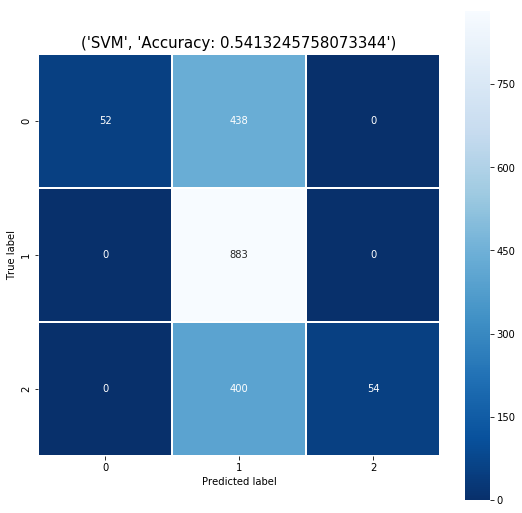

In [27]:
print_matrix(cm_svm, accuracy_svm, model='SVM')

### Principal components 

Dimensionality reduction with SVM

In [28]:
# Principal Components n=6

pca = PCA(n_components=6)

principalComponents = pca.fit_transform(X)

df_pca = pd.DataFrame(data=principalComponents, columns =['pc1', 'pc2','pc3','pc4', 'pc5','pc6'])
display(df_pca.head())
display(df_pca.shape)

X_pca = df_pca
y_pca = df_model['Total Claim Labels']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2)


clf.fit(X_train_pca, y_train_pca)
clf.score(X_test_pca, y_test_pca)
y_pred_logistic_pca = clf.predict(X_test_pca)

accuracy_pca1 = metrics.accuracy_score(y_test_pca, y_pred_logistic_pca)

print ('PCA_1 - Accuracy:', accuracy_pca1)

,pc1,pc2,pc3,pc4,pc5,pc6
0,18585.866467,-5349.487790,-16.181436,42.057282,-25.275541,16.567111
1,-37662.700036,-806.689644,1.254330,6.130122,-0.832723,-2.510781
2,11137.787351,4817.909167,4.759635,10.636010,-20.279350,2.867427
3,-37658.830505,-140.351331,13.496079,-15.915326,10.279685,2.810997
4,6148.367871,-5227.072742,-9.941712,3.090754,-4.233710,-2.989890


(9134, 6)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


PCA_1 - Accuracy: 0.5489874110563766


In [29]:
# Principal Components n=2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents2 = pca.fit_transform(X)

df_pca2 = pd.DataFrame(data=principalComponents2, columns =['pc1', 'pc2'])
display(df_pca2.head())
display(df_pca2.shape)

X_pca2 = df_pca2
y_pca2 = df_model['Total Claim Labels']

X_train_pca2, X_test_pca2, y_train_pca2, y_test_pca2 = train_test_split(X_pca2, y_pca2, test_size=0.2)


clf.fit(X_train_pca2, y_train_pca2)
clf.score(X_test_pca2, y_test_pca2)
y_pred_logistic_pca2 = clf.predict(X_test_pca2)

accuracy_pca2 = metrics.accuracy_score(y_test_pca, y_pred_logistic_pca2)

print ('PCA_2 - Accuracy:', accuracy_pca2)

,pc1,pc2
0,18585.866467,-5349.487790
1,-37662.700036,-806.689644
2,11137.787351,4817.909167
3,-37658.830505,-140.351331
4,6148.367871,-5227.072742


(9134, 2)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


PCA_2 - Accuracy: 0.4663382594417077


### Random Forest Classifier

Random forest - 3 labels

In [30]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
ks_rf = RandomForestClassifier(n_estimators=10)
ks_rf.fit(X_train, y_train)

y_pred_test_rf = ks_rf.predict(X_test)


accuracy_random = metrics.accuracy_score(y_test, y_pred_test_rf)

print('Accuracy SVM:', accuracy_random)

Accuracy SVM: 0.8615216201423098


In [32]:
cm_random = metrics.confusion_matrix(y_test, y_pred_test_rf)

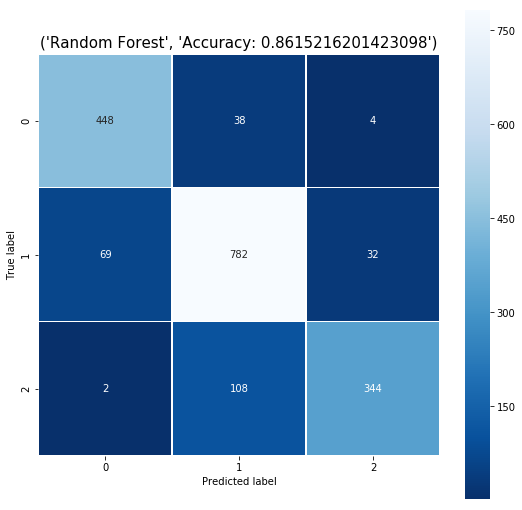

In [33]:
print_matrix(cm_random, accuracy_random, model='Random Forest')

We know that Random Forest classifying our data in 3 labels gives us a prediction of 0.87. Now we are going to try 4 labels to be more precise when categorizing potential future clients.

---------

## Train models
### Target Total Claim Labels -- 4 Labels

#### Target/ Data 

Total Claim Amount <br>
Convert Total Claim amount in 4 class

In [34]:
df2 = df.copy()
df2.drop(labels=['Total Claim Labels'], axis=1, inplace=True)

In [35]:
Total_claim_min = df2['Total Claim Amount'].min()
Total_claim_max = df2['Total Claim Amount'].max()
Total_claim_mean = df2['Total Claim Amount'].mean()
Total_claim_q1 = df2['Total Claim Amount'].quantile(0.25)
Total_claim_q2 = df2['Total Claim Amount'].quantile(0.75)
print(Total_claim_min, Total_claim_max, Total_claim_mean, Total_claim_q1, Total_claim_q2)

0.09900700000000001 2893.239678 434.0887943128969 272.2582445 547.5148387500001


Class (labels) <br>
0: Low <br>
1:Moderate <br>
2:High <br>
3: Very High <br>

In [36]:
#Labels = 0: Low , Moderate, High, Very High
cutoffs = [0, Total_claim_q1, Total_claim_mean, Total_claim_q2, Total_claim_max]
df2['Total Claim Labels'] = pd.cut(df2['Total Claim Amount'],cutoffs, labels=[0,1,2,3])
print(df2['Total Claim Labels'].head())


0    1
1    3
2    3
3    2
4    0
Name: Total Claim Labels, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [37]:
# Change type
df2['Total Claim Labels'] = df2['Total Claim Labels'].astype('int64')
df2['Total Claim Labels'].dtype

dtype('int64')

In [38]:
df2['Total Claim Labels'].value_counts()

1    2930
3    2284
0    2284
2    1636
Name: Total Claim Labels, dtype: int64

In [39]:
df2.drop(labels=['Total Claim Amount'], axis=1, inplace=True)

In [40]:
df2.head(3)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Labels
0,Washington,2763.519279,No,Basic,Bachelor,734192,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,1
1,Arizona,6979.535903,No,Extended,Bachelor,734168,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,3
2,Nevada,12887.431650,No,Premium,Bachelor,734187,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,3


In [41]:
columns=[col for col in df2.columns if df2[col].dtype == object]

df_model2 = pd.get_dummies(data=df2, columns = columns, drop_first=True)

In [42]:
df_model2.head()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Labels,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,734192,56274,69,32,5,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,734168,0,94,13,42,0,8,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,734187,48767,108,18,38,0,2,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,734157,0,106,18,65,0,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,734171,43836,73,12,44,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [43]:
cols = [col for col in df_model2.columns if col != 'Total Claim Labels']
X_2 = df_model2[cols]
y_2 = df_model2['Total Claim Labels']


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2)


### Support Vector Machine - SVC 
Support Vector Machine with SVC - 4 class
Grid Search for know the best parameters

#### Grid Search  SVM - SVC

In [44]:
clf = svm.SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

parameters = {'C':[1, 10, 20], 'gamma':('auto', 'scale'), 'coef0': [0.0, 0.1]}

svc_grid = svm.SVC()
clf = GridSearchCV(svc_grid, parameters, cv=5)

clf.fit(X_train, y_train)

clf.best_params_

Results of Grid Search <br>
clf.best_params_ = {'C': 20, 'coef0': 0.0, 'gamma': 'scale'}

In [45]:
clf = svm.SVC(C=20, gamma='scale', coef0=0.0)
clf.fit(X_train_2, y_train_2)
print('Score:', clf.score(X_test_2, y_test_2))
print('Intercept:', clf.intercept_)

y_pred2 = clf.predict(X_test_2)


accuracy_svm = metrics.accuracy_score(y_test_2, y_pred2)
print('Accuracy SVM:', accuracy_svm)

Score: 0.47071702244116037
Intercept: [ 0.06643643  0.47856452  0.1235287   0.48451077  0.14795756 -0.29739156]
Accuracy SVM: 0.47071702244116037


In [46]:
cm_svm = metrics.confusion_matrix(y_test_2, y_pred1)

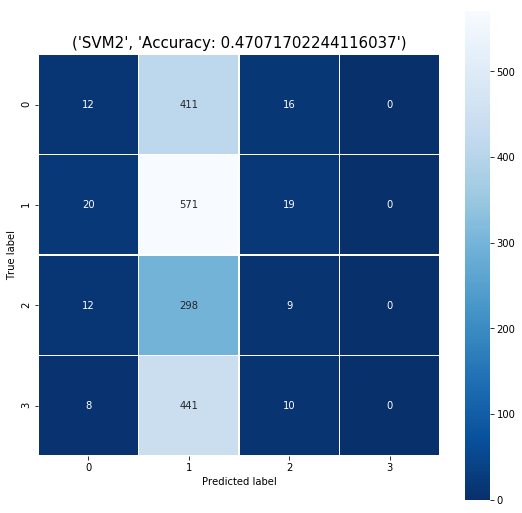

In [47]:
print_matrix(cm_svm, accuracy_svm, model='SVM2')

### Support Vector Machine  - SVC (Standard Scaler)
Process data with robust scaler to minimize outliers.

/home/miriam/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/miriam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


SVM Standar Scaler - Accuracy: 0.7416529830322933


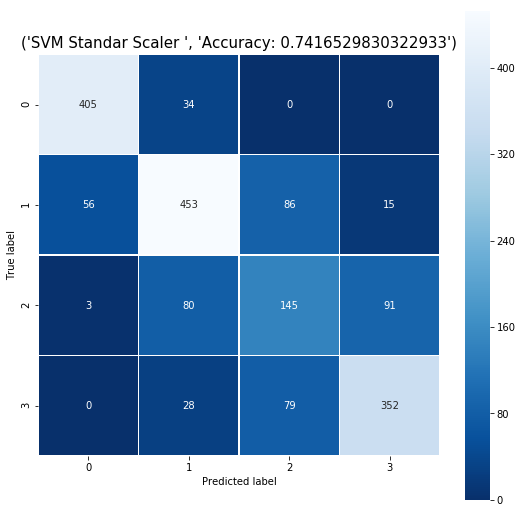

In [48]:
standard_scaler = StandardScaler().fit(X_train)

X_train_transform = standard_scaler.fit_transform(X_train_2)
X_test_transform = standard_scaler.transform(X_test_2)

clf.fit(X_train_transform, y_train_2)

y_pred_transform = clf.predict(X_test_transform)

accuracy_svm_Robust = metrics.accuracy_score(y_test_2, y_pred_transform)

cm_svm_robust = metrics.confusion_matrix(y_test_2, y_pred_transform)

print("SVM Standar Scaler - Accuracy:", accuracy_svm_Robust)

print_matrix(cm_svm_robust, accuracy_svm_Robust, model= 'SVM Standar Scaler ')

### Random Forest Classifier
Random Forest for target with 4 class. 
#### This is the model with higher precision

In [49]:
parameters = {'n_estimators':[5, 10, 15, 30, 50, 80, 100]}

ks_grid = RandomForestClassifier()
clf_grid = GridSearchCV(ks_grid, parameters, cv=5)

clf_grid.fit(X_train, y_train)

clf_grid.best_params_

{'n_estimators': 80}

In [50]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
ks_rf = RandomForestClassifier(n_estimators=80, class_weight={0: 2284, 1:2930, 2:1636, 3:2248})
ks_rf.fit(X_train_2, y_train_2)

y_pred_test_rf = ks_rf.predict(X_test_2)


accuracy_random = metrics.accuracy_score(y_test_2, y_pred_test_rf)

print('Accuracy SVM:', accuracy_random)

Accuracy SVM: 0.8139025725232621


Random Forest with 4 classes is our model with the best accuracy, 0.80. Now let's evaluate the model

---

## Evaluate Random Forest 

In [52]:
cm_random = metrics.confusion_matrix(y_test_2, y_pred_test_rf)

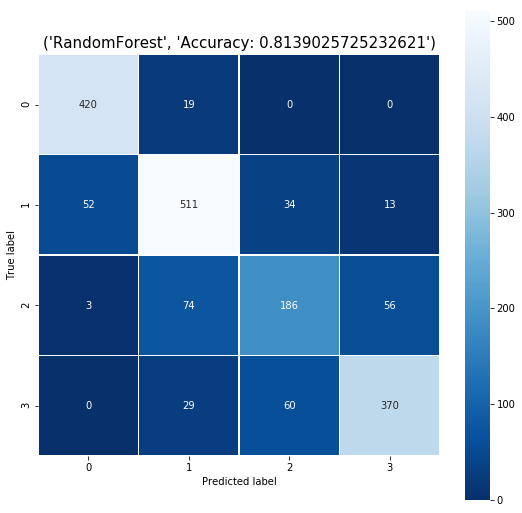

In [53]:
print_matrix(cm_random, accuracy_random, model='RandomForest')

### Cross Validation 
Cross Validation for Random Forest

In [54]:
scores = cross_val_score(ks_rf, X_2, y_2, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.80708661 0.80052493 0.80170716 0.78857518 0.81184211 0.8125    ]


In [55]:
report = classification_report(y_test_2, y_pred_test_rf)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       439
           1       0.81      0.84      0.82       610
           2       0.66      0.58      0.62       319
           3       0.84      0.81      0.82       459

   micro avg       0.81      0.81      0.81      1827
   macro avg       0.80      0.80      0.80      1827
weighted avg       0.81      0.81      0.81      1827



### ROC curve
Random Forest Roc Curve

In [56]:
# Binarize data target class
y_binarize = label_binarize(y_2, classes=[0,1,2,3])
n_classes = 4
X_train_binarize, X_test_binarize, y_train_binarize, y_test_binarize =train_test_split(X_2, y_binarize)


ks_binarize = RandomForestClassifier(n_estimators=10).fit(X_train_binarize, y_train_binarize)

y_pred_test_binarize = ks_binarize.predict(X_test_binarize)

accuracy_random_bin = metrics.accuracy_score(y_test_binarize, y_pred_test_binarize)

In [57]:
# Calculate a AUC for each class. 
n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:,i], y_pred_test_binarize[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('roc_auc', i, roc_auc[i])

roc_auc 0 0.9347093634065465
roc_auc 1 0.7955388944216609
roc_auc 2 0.6782072368421053
roc_auc 3 0.857785199504277


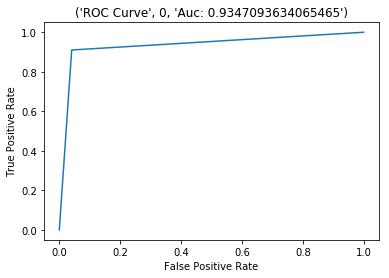

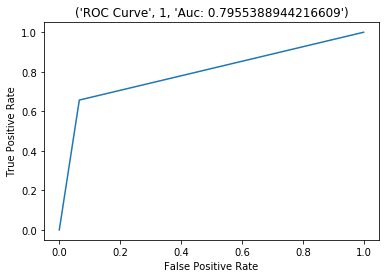

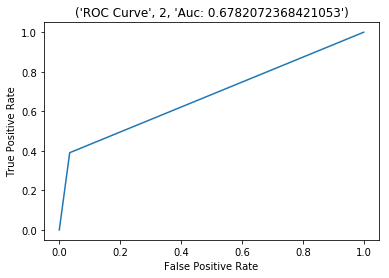

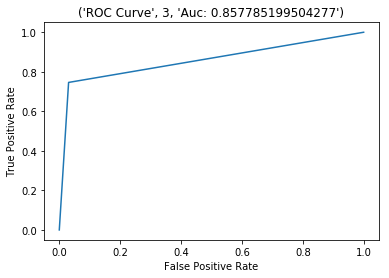

In [58]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    title = 'ROC Curve', i,'Auc: {0}'.format(roc_auc[i])
    plt.title (title)
    plt.show()

---

## Eliminate Features 

Let's eliminate a features than it can be unknown per client: <br>
Months Since Last Claim <br>
Months Since Policy Inception <br>
Number of Open Complaints <br>
Response <br>

In [59]:
df3 = df2.copy()

In [60]:
df3.drop(labels=['Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Response', 'Effective To Date'], axis=1, inplace=True)

Eliminate a feature 'Customer Lifetime Value' than can be very important for our model discriminant. 

In [61]:
df3.drop(labels=['Customer Lifetime Value'], axis=1, inplace=True)

In [62]:
columns=[col for col in df3.columns if df3[col].dtype == object]

df_model3 = pd.get_dummies(data=df3, columns = columns, drop_first=True)

In [63]:
df_model3.head()

,Income,Monthly Premium Auto,Number of Policies,Total Claim Labels,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,69,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,94,8,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,48767,108,2,3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,106,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,43836,73,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [64]:
cols = [col for col in df_model3.columns if col != 'Total Claim Labels']
X_3 = df_model3[cols]
y_3 = df_model3['Total Claim Labels']


X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2)

Accuracy SVM: 0.8029556650246306


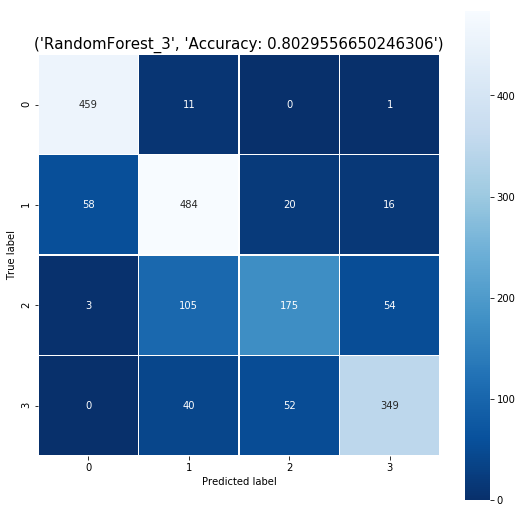

In [65]:
RandomForestClassifier()

ks_rf = RandomForestClassifier(n_estimators=50)
ks_rf.fit(X_train_3, y_train_3)

y_pred_test_rf = ks_rf.predict(X_test_3)


accuracy_random = metrics.accuracy_score(y_test_3, y_pred_test_rf)

print('Accuracy SVM:', accuracy_random)


cm_random = metrics.confusion_matrix(y_test_3, y_pred_test_rf)

print_matrix(cm_random, accuracy_random, model='RandomForest_3')